In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from utilities import load_cotton
from utilities import load_rice

In [2]:
cotton_2021 = load_cotton("./Crop-dataset/Cotton/cotton2021.csv")
cotton_2022 = load_cotton('./Crop-dataset/Cotton/cotton2022.csv')
cotton_2023 = load_cotton("./Crop-dataset/Cotton/cotton2023.csv")

cotton_2021.shape, cotton_2022.shape, cotton_2023.shape

((2883, 13), (12411, 13), (11777, 13))

In [3]:
rice_2021 = load_rice('./Crop-dataset/Rice/rice2021.csv')
rice_2022 = load_rice("./Crop-dataset/Rice/rice2022.csv")
rice_2023 = load_rice("./Crop-dataset/Rice/rice2023.csv")

rice_2021.shape, rice_2022.shape, rice_2023.shape

((419, 13), (4687, 13), (919, 13))

In [4]:
dataset_2021 = pd.concat([cotton_2021, rice_2021])
dataset_2022 = pd.concat([cotton_2022, rice_2022])
dataset_2023 = pd.concat([cotton_2023, rice_2023])

### Plotting class distribution

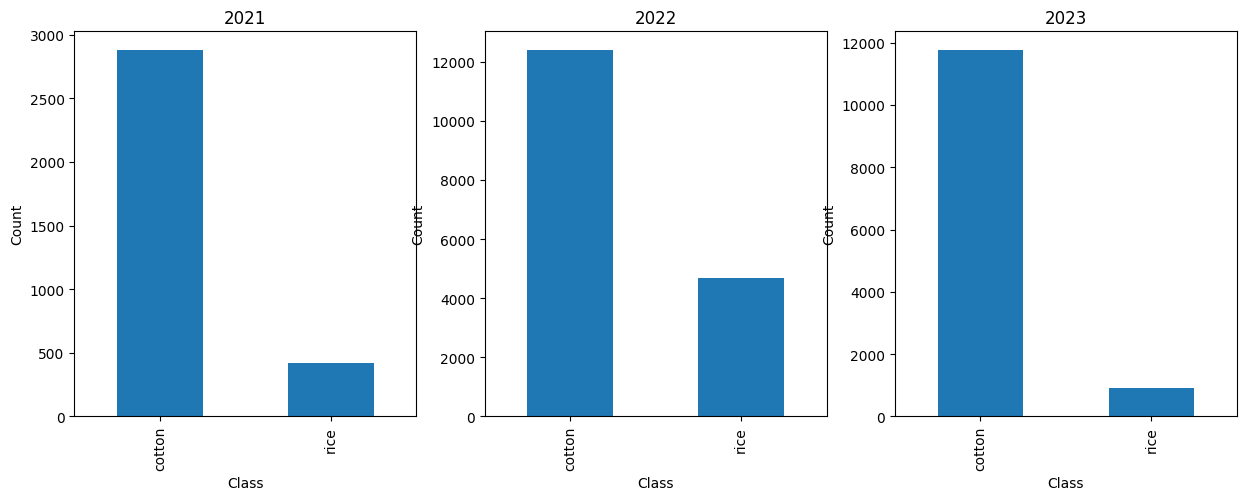

In [5]:
from plots import draw_bar_class_value_counts

draw_bar_class_value_counts([dataset_2021, dataset_2022, dataset_2023], ["2021", "2022", "2023"])


### Using SMOTE to resample the dataset

In [6]:
from utilities import resample_with_smote

dataset_2021_resampled = resample_with_smote(dataset_2021, random_state=42, sampling_strategy=0.8)
dataset_2022_resampled = resample_with_smote(dataset_2022, random_state=42, sampling_strategy=0.8)
dataset_2023_resampled = resample_with_smote(dataset_2023, random_state=42, sampling_strategy=0.8)

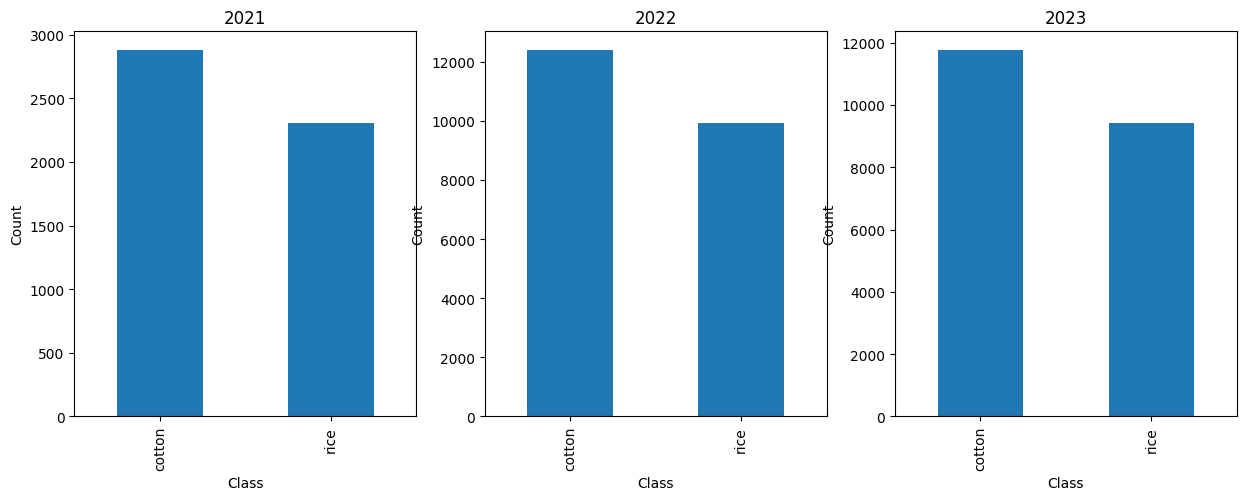

In [10]:
draw_bar_class_value_counts([dataset_2021_resampled, dataset_2022_resampled, dataset_2023_resampled], ["2021", "2022", "2023"])

### Plotting the points using PCA

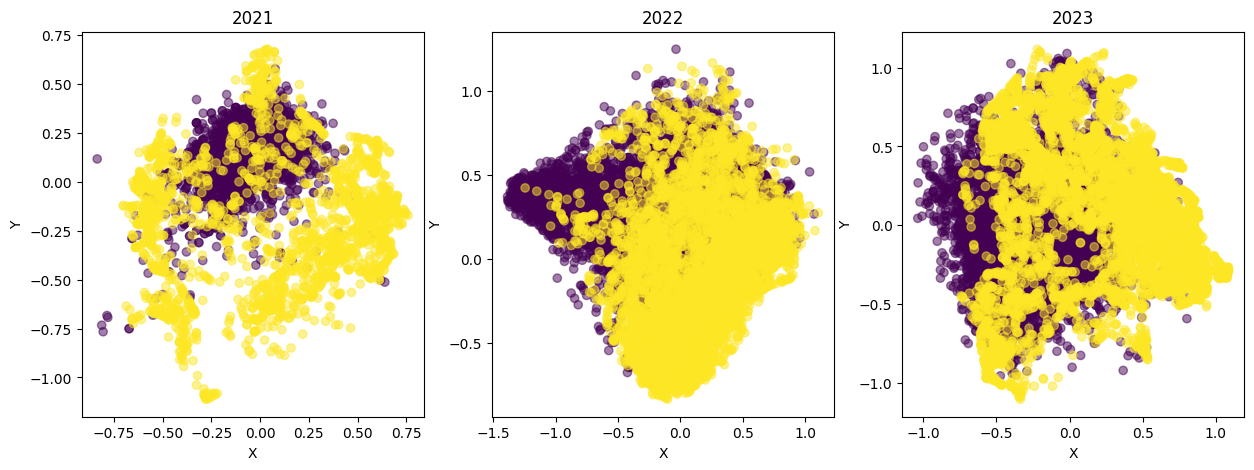

In [12]:
from plots import draw_scatter_subplots
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
results = []

for dataset in [dataset_2021_resampled, dataset_2022_resampled, dataset_2023_resampled]:
    pca_result = pca.fit_transform(dataset.drop(['class'], axis=1))
    pca_df = pd.DataFrame(data=pca_result, columns=['pca1', 'pca2'])
    pca_df['class'] = dataset['class'].values
    results.append(pca_df)


draw_scatter_subplots(
    results,
    ["2021", "2022", "2023"],
)

### Creating all the possible three splits

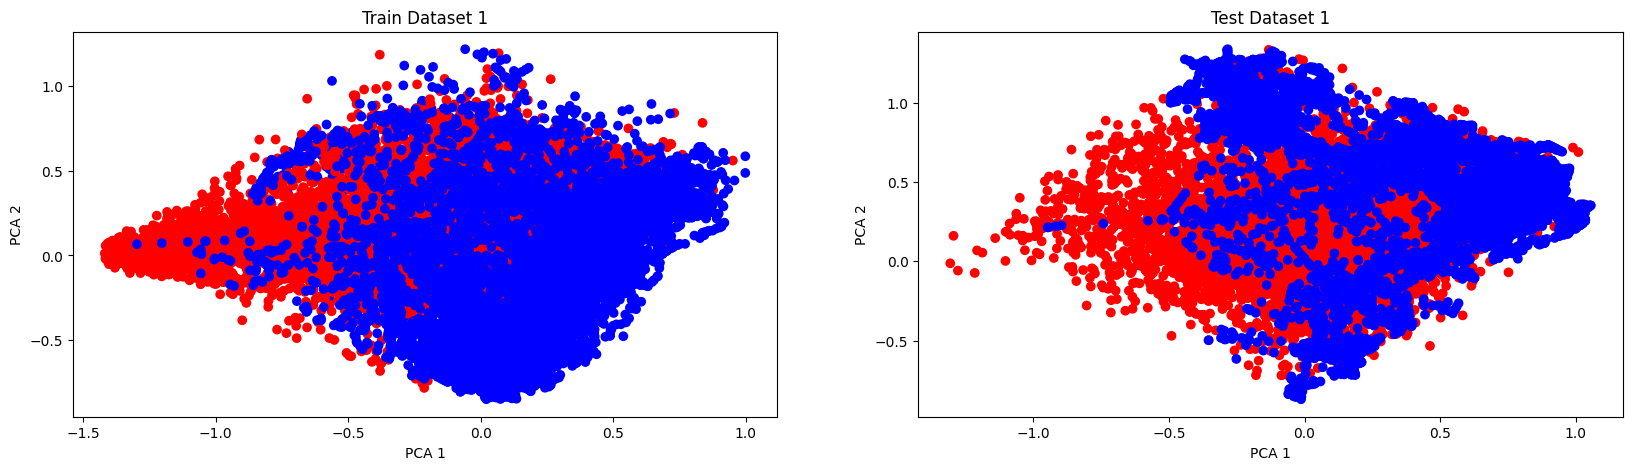

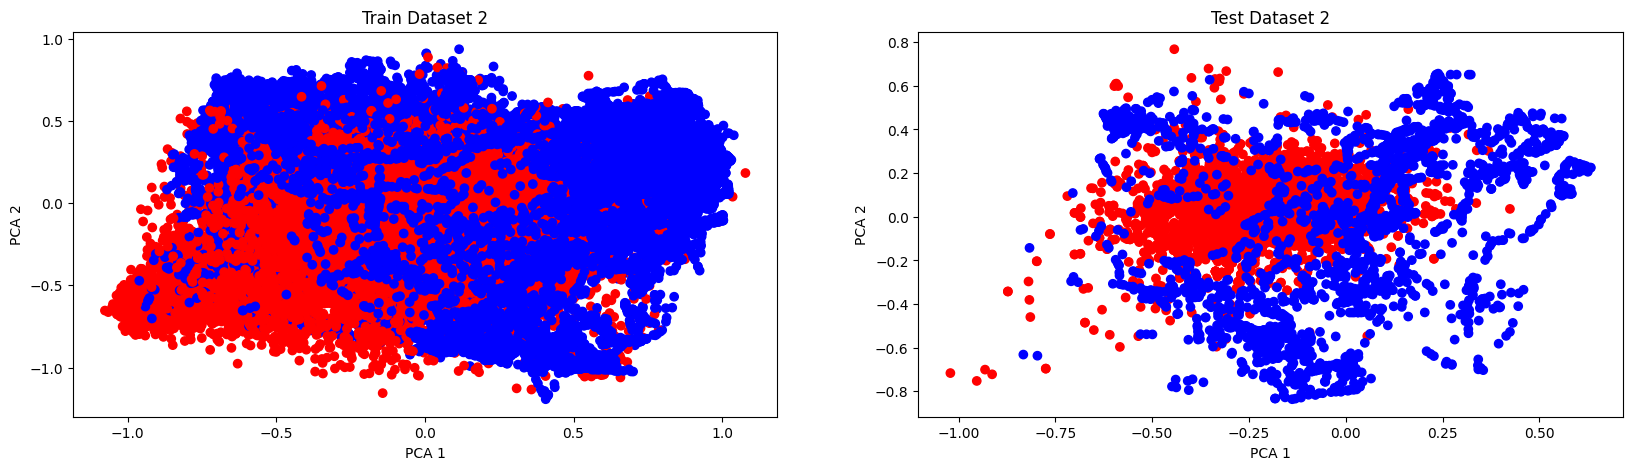

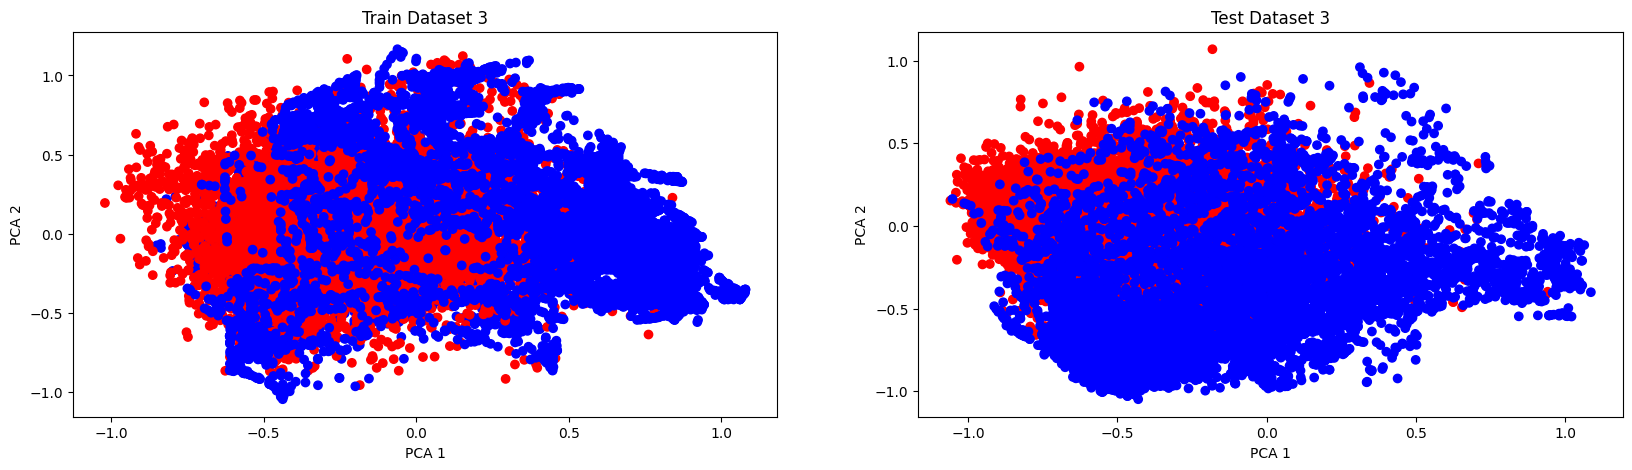

In [9]:
cross_validation_splits = [
    (pd.concat([dataset_2021_resampled, dataset_2022_resampled]), dataset_2023_resampled),
    (pd.concat([dataset_2022_resampled, dataset_2023_resampled]), dataset_2021_resampled),
    (pd.concat([dataset_2021_resampled, dataset_2023_resampled]), dataset_2022_resampled)
]

for i, (train, test) in enumerate(cross_validation_splits):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(train.drop(['class'], axis=1))

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train['class'].map({'cotton': 'red', 'rice': 'blue'}))
    plt.title(f'Train Dataset {i + 1}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    pca_result = pca.transform(test.drop(['class'], axis=1))

    plt.subplot(1, 2, 2)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=test['class'].map({'cotton': 'red', 'rice': 'blue'}))
    plt.title(f'Test Dataset {i + 1}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.show()
